# Vessels API Use Case - Explore Vessels

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/VesselsAPI/ExploreVessels.ipynb) 

<h3>Setup</h3>

In [ ]:
pip install seaborn

Install the Signal Ocean SDK:

In [ ]:
pip install signal-ocean

Import required libraries / APIs / packages:

<h3>Import Vessels API and some additional libraries</h3>

In [ ]:
from signal_ocean.vessels import VesselsAPI
import pandas as pd
import seaborn as sns
from datetime import datetime
from signal_ocean import Connection

Fill in your personal SignalOcean API subscription key acquired <a href="https://apis.signalocean.com/profile" target="_blank">here</a> and open a connection:

In [1]:
signal_ocean_api_key = '' #replace with your subscription key

Create a connection

In [2]:
connection = Connection(signal_ocean_api_key)

## Call the vessels API
The Vessels API retrieves vessel information.

In [2]:
api = VesselsAPI(connection)

#### Get details for all vessels

In [5]:
vessels = api.get_vessels()

Extract the returned information into a dataframe

In [6]:
df = pd.DataFrame([x.__dict__ for x in vessels])

#### Visualize fleet age by vessel class for VLCC, Suezmax and Aframax Tankers

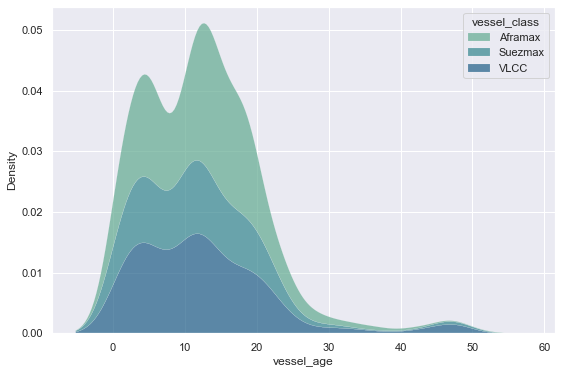

In [7]:
df['vessel_age'] = df.apply(lambda r: datetime.now().year - r['year_built'], axis=1)
data = df[(pd.isnull(df['scrapped_date']))&(df['vessel_class'].isin(['VLCC', 'Suezmax', 'Aframax']))]

sns.set(rc={'figure.figsize':(9,6)})
sns.kdeplot(data=data, x='vessel_age', hue='vessel_class', multiple="stack", palette="crest",
   alpha=.7, linewidth=0.1);

#### Visualize pairwise relationships for deadweight, length_overall and breadth_extreme for VLCC, Suezmax and Aframax Tankers

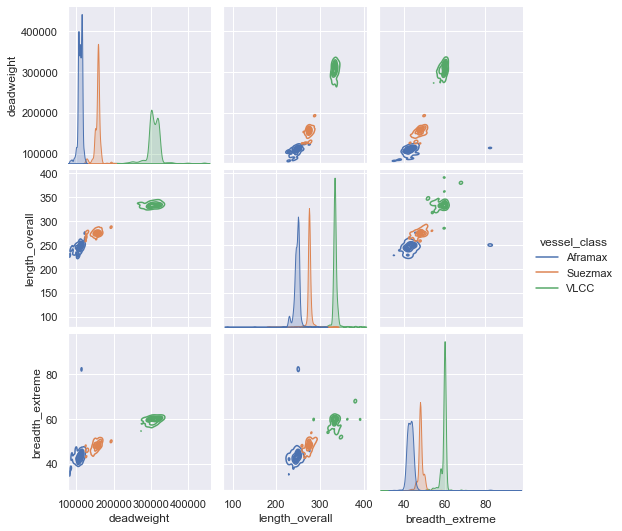

In [8]:
data = df[(pd.isnull(df['scrapped_date']))&(df['vessel_class'].isin(['VLCC', 'Suezmax', 'Aframax']))]

sns.pairplot(data, kind='kde', hue='vessel_class', vars=['deadweight', 'length_overall', 'breadth_extreme']);